# PRUEBA GRAFO TURING SAVE THE PROGRAM

## Set up

In [1]:
import sys, pathlib
ROOT = pathlib.Path().resolve().parents[0]  # asume notebook en subcarpeta
sys.path.append(str(ROOT))

from agent.graph import build_graph
from agent.state import ChatVisionState
from langchain_core.messages import HumanMessage


## Lang fuse

In [2]:
from langfuse.langchain import CallbackHandler
import os
from langgraph.checkpoint.memory import MemorySaver


# Get keys for your project from the project settings page: https://cloud.langfuse.com
os.environ["LANGFUSE_PUBLIC_KEY"] = "pk-lf-d0b9900c-5be4-4dd6-a7e1-93a3bf4b132c"
os.environ["LANGFUSE_SECRET_KEY"] = "sk-lf-4a92f9c3-1f53-475f-9855-f2a6d0178079"
os.environ["LANGFUSE_HOST"] = "https://cloud.langfuse.com"  # 🇪🇺 EU region
handler = CallbackHandler()

memory = MemorySaver()



## Construir grafo

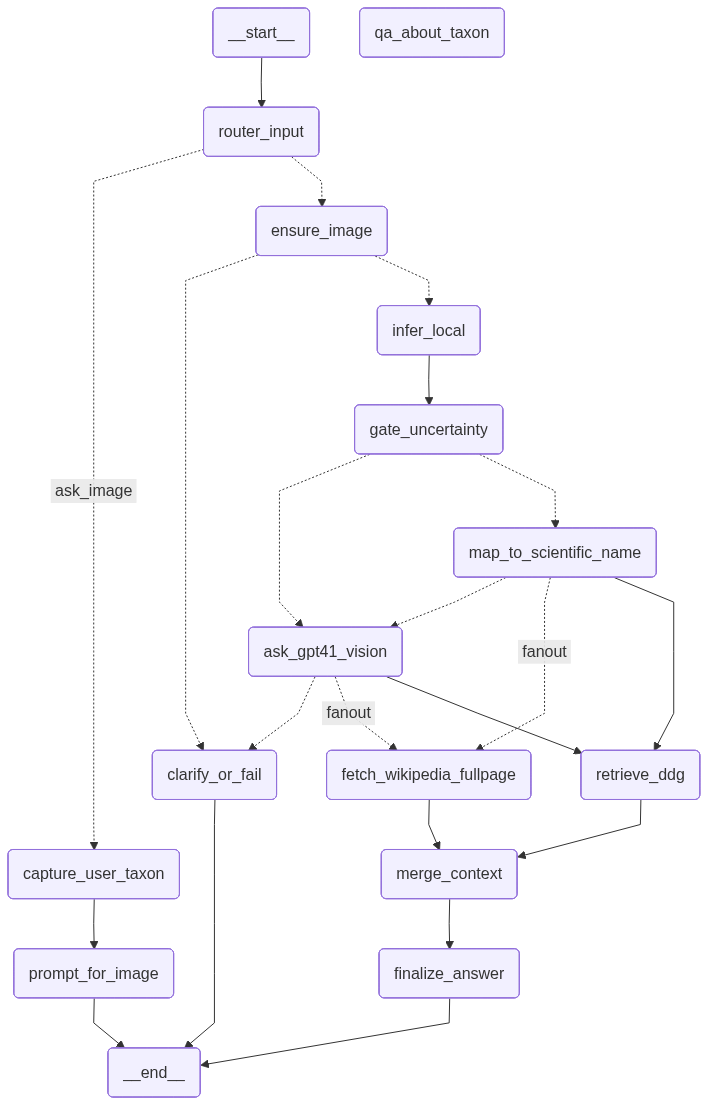

In [3]:
from IPython.display import Image, display
graph = build_graph()
display(Image(graph.get_graph().draw_mermaid_png()))

## Clasificacion imagen

In [4]:
import os
from langgraph.checkpoint.memory import MemorySaver

from agent.graph import build_graph
from agent.state import ChatVisionState
from agent.utils.images import download_to_bytes
from langchain_core.messages import HumanMessage

# ---- Langfuse (no quites esto) ----
os.environ.setdefault("LANGFUSE_PUBLIC_KEY", "pk-...")
os.environ.setdefault("LANGFUSE_SECRET_KEY", "sk-...")
os.environ.setdefault("LANGFUSE_HOST", "https://cloud.langfuse.com")
handler = CallbackHandler()
memory = MemorySaver()
# -----------------------------------

# Imagen (usar User-Agent friendly helper que ya tienes)
img_url = "https://upload.wikimedia.org/wikipedia/commons/6/6e/Macaque_ds.jpg"
img_bytes = download_to_bytes(img_url)

print("Tipo de img_bytes:", type(img_bytes))
print("Tamaño de img_bytes:", len(img_bytes))

# Estado inicial
state: ChatVisionState = {
    "messages": [HumanMessage(content="¿Qué especie es esta?")],
    "image_bytes": img_bytes,          # puedes alternar por image_url o _tmp.image_path si quieres
    # "image_url": "https://....jpg",
    # "_tmp": {"image_path": "/ruta/temporal.jpg"},
}

print("Estado inicial keys:", list(state.keys()))

# Construir el grafo
graph = build_graph()

# Ejecutar con callbacks Langfuse
result = graph.invoke(state, config={"callbacks": [handler], "configurable": {"thread_id": "test1"}})


# Mostrar mensajes
for m in result.get("messages", []):
    role = "human" if getattr(m, "type", "") == "human" else "ai"
    print(f"[{role}] {m.content}")

# Depurar ruta y tmp
print("\n--- DEBUG Estado final ---")
print("route:", result.get("route"))
print("_tmp keys:", list(result.get("_tmp", {}).keys()) if result.get("_tmp") else None)




Tipo de img_bytes: <class 'bytes'>
Tamaño de img_bytes: 3047478
Estado inicial keys: ['messages', 'image_bytes']
[human] ¿Qué especie es esta?
[ai] Para continuar necesito **una imagen válida del primate**.

### ¿Qué ha pasado?
- El verificador externo de visión no pudo confirmar la especie.

### Qué necesito ahora
- Sube una **imagen en JPG o PNG** (ideal < 5 MB).
- Si usas URL, asegúrate de que es pública y directa al archivo.

### Consejos para una mejor foto
- Rostro visible y sin oclusiones.
- Buena iluminación natural (evita contraluces).
- Fondo relativamente simple y poco ruido visual.
- El sujeto debe ocupar una porción significativa del encuadre.
- Evita desenfoque: apoya el móvil o usa ambos codos para estabilizar.

### Requisitos mínimos
- **Formatos**: JPG, PNG
- **Tamaño**: recomendable < 5 MB
- **Resolución**: ≥ 512 px en el lado corto
[ai] No se ha proporcionado información sobre la especie ni contexto adicional para identificarla o describirla. Por favor, proporcione m